<a href="https://colab.research.google.com/github/sheng-999/CSR/blob/upload/CO2_vs_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 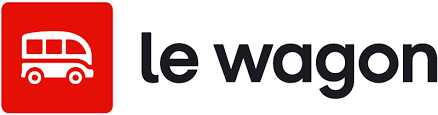

# CO2 and temperature

a) Download [`temperature_gaz_dataset.xlsx`](https://docs.google.com/spreadsheets/d/17swNTF9NSX14I05mfLpqTcvfxxxcTeej/edit?usp=sharing&ouid=101172426362035713447&rtpof=true&sd=true) and upload it to Google Colab.

b) Execute cell below to load data.

In [18]:
import pandas as pd

# load data
temperature = pd.read_excel("/content/temperature_gaz_dataset.xlsx", sheet_name="temperature", dtype={'date_date': int})
co2 = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="co2", dtype={'date_date': int})
ch4 = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="ch4", dtype={'date_date': int})
no2 = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="no2", dtype={'date_date': int})

Temperature values are delta values in comparison with the average calculated on base period 1951-1980 as per source NASA GISS GLOBAL Land-Ocean Temperature Index

c) We want to find a common date range period between the four dataframes.

What is the maximum of the minimum dates and the minimum of the maximum dates?

Store it in `min_date_date` and `max_date_date` variables.

<details>
    <summary><i>Hint:</i></summary>

min() function can take several arguments.
</details>   

In [19]:
min_date_date = max([temperature['date_date'].min(), co2['date_date'].min(), ch4['date_date'].min(),no2['date_date'].min()])
min_date_date

-796050

In [20]:
max_date_date= min([temperature['date_date'].max(),co2['date_date'].max(), ch4['date_date'].max(),no2['date_date'].max()])
max_date_date

2015

d) Create a DataFrame `df_all` of one column "date_date" with years between `min_date_date` and `max_date_date`.

<details>
    <summary><i>Hint:</i></summary>

You can use `list(range( , ))` for values
</details>   

In [21]:
range_year = list(range(min_date_date, max_date_date + 1))

In [22]:
df_all = pd.DataFrame({'date_date': range_year})
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798066 entries, 0 to 798065
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   date_date  798066 non-null  int64
dtypes: int64(1)
memory usage: 6.1 MB


e) Using `merge` function, merge all dataframes into `df_all`.
You should end with a DataFrame of 5 columns: "date_date", "temperature", "co2", "ch4" and "no2".

<details>
    <summary><i>Solution:</i></summary>

df_all = df_all.merge(temperature, how="left", on="date_date")
</details>   

In [23]:
df_all = df_all.merge(temperature, how="left", on="date_date")
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798066 entries, 0 to 798065
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_date    798066 non-null  int64  
 1   temperature  615 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 18.3 MB


In [28]:
df_all = df_all.merge(co2, how="left", on="date_date")
df_all = df_all.merge(ch4, how="left", on="date_date")
df_all = df_all.merge(no2, how="left", on="date_date")

f) We want to interpolate NaN values. Use the `interpolate()` pandas function to fill nan values with linear interpolation. After this interpolation, you will see that we still have missing values at the head of the dataframe. For these values, we can apply a second interpolate function with the backfill method.

<details>
    <summary><i>Solution:</i></summary>

df_all = df_all.interpolate().interpolate(method="backfill")
</details>   

In [33]:
df_all = df_all.interpolate().interpolate(method="backfill")

# Short term analysis

a) In a new `df_all_last_150` variable, select last 150 rows of `df_all`.

<details>
    <summary><i>Hint:</i></summary>
use iloc function with negative index
</details>  


<details>
    <summary><i>Solution:</i></summary>
df_all_last_150 = df_all.iloc[-150:, :]
</details>  

In [36]:
df_all_last_150 = df_all.iloc[-150:, :]

b) Calculate matrix of correlation between ["temperature", "co2", "ch4", "no2"] columns.

What do you see? Is there any correlation between temperature and other features?

In [39]:
df_all_last_150[["temperature", "co2", "ch4", "no2"]].corr()

# temperature haas highly correlated with others

,temperature,co2,ch4,no2
temperature,1.000000,0.928968,0.885056,0.925038
co2,0.928968,1.000000,0.950862,0.997823
ch4,0.885056,0.950862,1.000000,0.964885
no2,0.925038,0.997823,0.964885,1.000000


<details>
    <summary><i>Solution:</i></summary>
Temperature is highly correlated with other features!
</details>

c) With `plotly.express` plot temperature evolution.

What do you see? Is it going up?

In [40]:
import plotly.express as px

In [50]:
px.line(df_all_last_150,
        x='date_date',
        y='temperature',
        title = 'Temperature Evolution')

<details>
    <summary><i>Solution:</i></summary>
Temperatures have risen rapidly over the last century and the situation is getting worse.
</details>

d) Perform a linear regression between temperature and co2.

Calcule regression score.

Be careful to split your data between train and test.

Which score do you obtain? Does co2 predict well temperature? Is it perfect?

<details>
    <summary><i>Solution:</i></summary>

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_all_last_150[["co2"]]
y = df_all_last_150[["temperature"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)
</details>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    df_all_last_150[['co2']],
    df_all_last_150[['temperature']],
    test_size = 0.2,
    random_state = 42
)

lin = LinearRegression()
reg = lin.fit(x_train, y_train)
reg.score(x_test, y_test) # 0.8469155624334688

0.8469155624334688

<details>
    <summary><i>Solution:</i></summary>


The default scoring for a linear regression is the Adjusted R². The score on both train ad test set is 0.86. It's a very good score, co2 is a good feature to predict temperature.
We need extra features to perfectly predict the temperature, co2 is one among many. But co2 alone explains already a lot!
</details>

e) [BONUS] Take back `df_all_last_150` variable and make a linear regression on co2, ch4 and no2.

Is the result better? Why?

In [57]:
x_train, x_test, y_train, y_test = train_test_split(
    df_all_last_150[['ch4']],
    df_all_last_150[['temperature']],
    test_size = 0.2,
    random_state = 42
)

lin = LinearRegression()
reg = lin.fit(x_train, y_train)
reg.score(x_test, y_test) # 0.7353381260416771

0.7353381260416771

In [58]:
x_train, x_test, y_train, y_test = train_test_split(
    df_all_last_150[['no2']],
    df_all_last_150[['temperature']],
    test_size = 0.2,
    random_state = 42
)

lin = LinearRegression()
reg = lin.fit(x_train, y_train)
reg.score(x_test, y_test) # 0.8393147200955504

0.8393147200955504

<details>
    <summary><i>Solution:</i></summary>
The result is not better, this is due to the fact that features are highly inter-correlated. Is there no2 because there is co2 or vice versa?  
</details>  

# Long term analysis

a) Starting from the `df_all` dataframe, recalculate the correlation matrix but on over the whole period. Are those features correlated when we look at the whole period?

In [60]:
df_all[['temperature','co2','ch4','no2']].corr()

,temperature,co2,ch4,no2
temperature,1.000000,0.699641,0.693988,0.566816
co2,0.699641,1.000000,0.792153,0.682131
ch4,0.693988,0.792153,1.000000,0.711314
no2,0.566816,0.682131,0.711314,1.000000


<details>
    <summary><i>Solution:</i></summary>
Yes, there is still a high correlation, but lower. Let's try to understand why.

</details>  

b) Plot temperature evolution since the beginning.

For that you need to subsample data to not overload Plotly.

What does this instruction do?

In [61]:
df_all[df_all.date_date % 50 == 0]

,date_date,temperature,co2,ch4,no2
0,-796050,-1.684176,188.40,396.000000,248.800000
50,-796000,-1.697068,188.40,396.000000,248.800000
100,-795950,-1.709959,188.40,396.000000,248.800000
150,-795900,-1.722850,188.40,396.000000,248.800000
200,-795850,-1.735742,188.40,396.000000,248.800000
...,...,...,...,...,...
797850,1800,-0.100000,282.90,712.476190,267.107895
797900,1850,-0.162500,285.20,812.300885,270.814634
797950,1900,-0.090000,296.70,866.725664,278.253659
798000,1950,-0.170000,312.00,1111.041915,285.800000


<details>
    <summary><i>Solution:</i></summary>
Each year which is a multiple of 50 is kept. So one temperature value every 50 years.
</details>  

c) Plot temperature evolution with plotly.express with df_all downsampled.

What do you see?


<details>
    <summary><i>Solution:</i></summary>

import plotly.express as px

fig = px.line(df_all[df_all.date_date % 50 == 0], x="date_date", y="temperature")
fig.show()
</details>  

In [63]:
px.line(
    df_all[df_all.date_date % 50 == 0],
    x= 'date_date',
    y= 'temperature'
)

<details>
    <summary><i>Solution:</i></summary>

We see a cyclical pattern, with different glacial and interglacial periods, due to slow changes in the tilt of the Earth's axis and its orbit around the Sun (🔗 [orbital forcing](https://en.wikipedia.org/wiki/Orbital_forcing)).
During the 🔗 [Last Glacial Maximum](https://en.wikipedia.org/wiki/Last_Glacial_Maximum), around 20,000 years ago, Northern Europe was covered with ice sheets, up to Germany and Poland. The whole of Canada est to the Rocky Mountains and parts of the USA were also covered in ice.
We are currently in a warm period, a so-called interglacial period (the 🔗 [Holocene](https://en.wikipedia.org/wiki/Holocene) in this case) which started around 11,700 years ago.
In modern times, we now see that it is human activities that are a driving factor for rising global temperatures.
</details>  